# TUBES DAMIN KNN 2020

Importing the necessary libraries

In [1]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

Load Data dan Menampilkan Data

In [2]:
data_train= pd.read_csv('train.csv')
data_train

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


In [3]:
# Melihat jumlah baris dan kolom
data_train.shape

(1879, 10)

In [4]:
# Tipe data setiap kolom
data_train.dtypes

trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                          int64
dtype: object

In [5]:
data_train.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [6]:
data_test= pd.read_csv('test.csv')
data_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,NaN
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,NaN
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,NaN
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,NaN
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,NaN


In [7]:
# Melihat jumlah baris dan kolom
data_test.shape

(498121, 10)

In [8]:
# Tipe data setiap kolom
data_test.dtypes

trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                        float64
dtype: object

In [9]:
data_test.isnull().sum()

trustLevel                        0
totalScanTimeInSeconds            0
grandTotal                        0
lineItemVoids                     0
scansWithoutRegistration          0
quantityModifications             0
scannedLineItemsPerSecond         0
valuePerSecond                    0
lineItemVoidsPerPosition          0
fraud                        498121
dtype: int64

In [10]:
cekDuplikat = data_train.drop_duplicates(keep= False, inplace= True)
print(cekDuplikat)

None


In [11]:
data_train.describe(include='all')

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


Korelasi

Pada tahap ini akan dihitung korelasi antar kolom/atribut pada data. Hal ini bertujuan untuk melihat atribut yang paling memiliki hubungan terhadap data target sehingga dapat dipertimbangkan atribut mana yang akan digunakan agar hasil pembelajaran lebih efektif serta akurasi lebih tinggi. Data target disini saya memutuskan untuk memilih'fraud'

In [12]:
korelasi=data_train.corr()
korelasi

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241,-0.319765
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623,0.110414
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858,0.001421
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514,0.063496
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834,0.074123
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318,-0.000864
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316,-0.023085
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886,-0.028873
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000,-0.090116
fraud,-0.319765,0.110414,0.001421,0.063496,0.074123,-0.000864,-0.023085,-0.028873,-0.090116,1.000000


In [13]:
cor = korelasi['fraud']
cor.drop(['fraud'])

trustLevel                  -0.319765
totalScanTimeInSeconds       0.110414
grandTotal                   0.001421
lineItemVoids                0.063496
scansWithoutRegistration     0.074123
quantityModifications       -0.000864
scannedLineItemsPerSecond   -0.023085
valuePerSecond              -0.028873
lineItemVoidsPerPosition    -0.090116
Name: fraud, dtype: float64

In [14]:
sorted(cor.drop(['fraud']), reverse=True)

[0.11041383578994331,
 0.07412251938437169,
 0.06349632453327045,
 0.0014208857850567384,
 -0.0008637731601254817,
 -0.023085349813921005,
 -0.02887274098097795,
 -0.09011639588232638,
 -0.31976521457945]

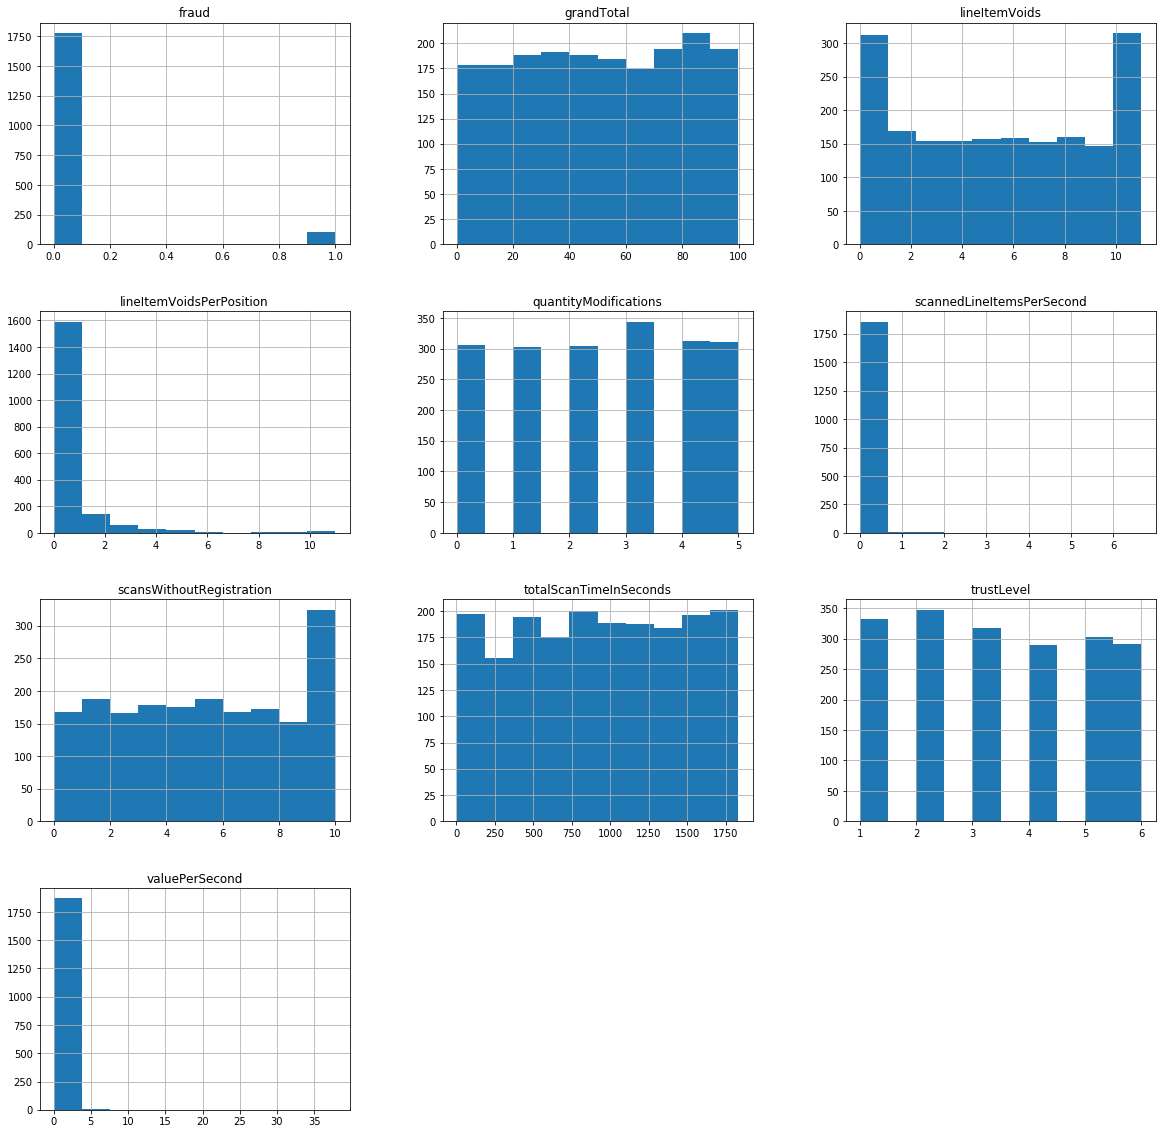

In [15]:
p = data_train.hist(figsize = (20,20))

In [16]:
data_train.var()

trustLevel                        2.922063
totalScanTimeInSeconds       281053.339647
grandTotal                      837.535273
lineItemVoids                    11.910570
scansWithoutRegistration          9.857698
quantityModifications             2.874627
scannedLineItemsPerSecond         0.077569
valuePerSecond                    1.542898
lineItemVoidsPerPosition          1.761570
fraud                             0.052313
dtype: float64

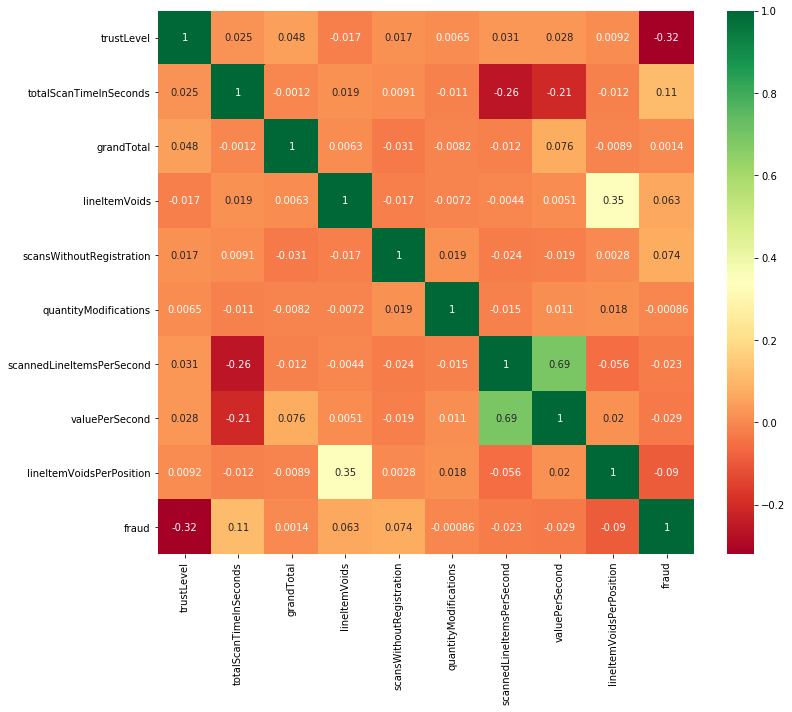

In [17]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_train.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Lihat Oultier

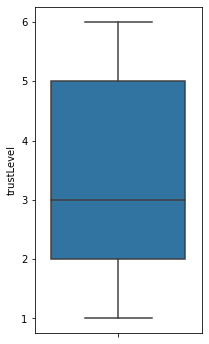

In [18]:
plt.figure(figsize=(3,6))
sns.boxplot(y='trustLevel', data=data_train,showfliers=False);

count    1879.000000
mean        3.401809
std         1.709404
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: trustLevel, dtype: float64

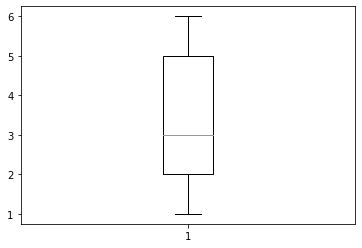

In [19]:
plt.boxplot(data_train['trustLevel'])
data_train['trustLevel'].describe()

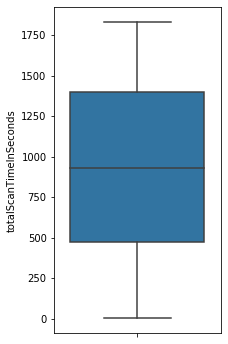

In [20]:
plt.figure(figsize=(3,6))
sns.boxplot(y='totalScanTimeInSeconds', data=data_train,showfliers=False);

count    1879.000000
mean      932.153273
std       530.144640
min         2.000000
25%       474.500000
50%       932.000000
75%      1397.000000
max      1831.000000
Name: totalScanTimeInSeconds, dtype: float64

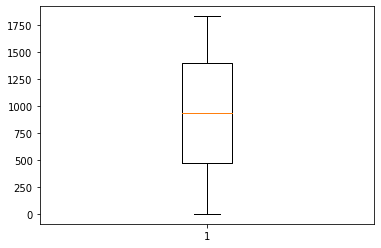

In [21]:
plt.boxplot(data_train['totalScanTimeInSeconds'])
data_train['totalScanTimeInSeconds'].describe()

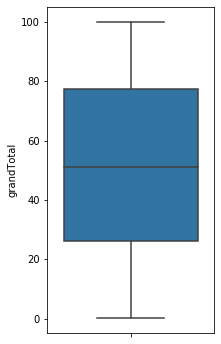

In [22]:
plt.figure(figsize=(3,6))
sns.boxplot(y='grandTotal', data=data_train,showfliers=False);

count    1879.000000
mean       50.864492
std        28.940202
min         0.010000
25%        25.965000
50%        51.210000
75%        77.285000
max        99.960000
Name: grandTotal, dtype: float64

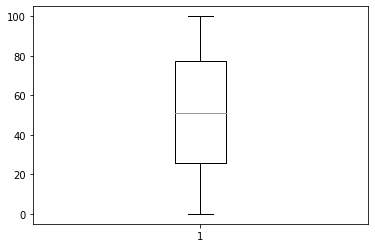

In [23]:
plt.boxplot(data_train['grandTotal'])
data_train['grandTotal'].describe()

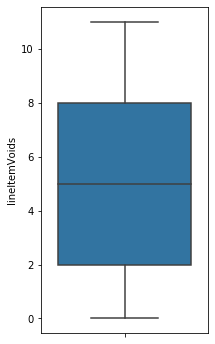

In [24]:
plt.figure(figsize=(3,6))
sns.boxplot(y='lineItemVoids', data=data_train,showfliers=False);

count    1879.000000
mean        5.469931
std         3.451169
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: lineItemVoids, dtype: float64

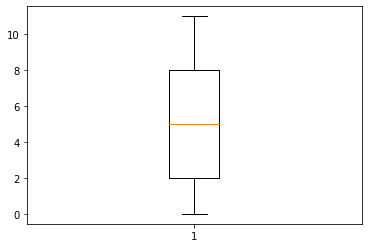

In [25]:
plt.boxplot(data_train['lineItemVoids'])
data_train['lineItemVoids'].describe()

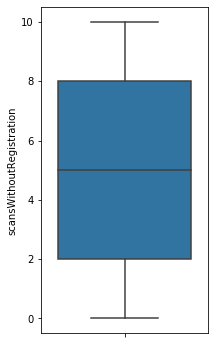

In [26]:
plt.figure(figsize=(3,6))
sns.boxplot(y='scansWithoutRegistration', data=data_train,showfliers=False);

count    1879.000000
mean        4.904204
std         3.139697
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: scansWithoutRegistration, dtype: float64

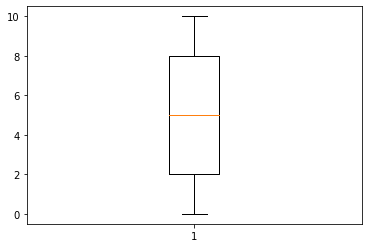

In [27]:
plt.boxplot(data_train['scansWithoutRegistration'])
data_train['scansWithoutRegistration'].describe()

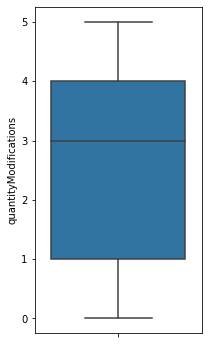

In [28]:
plt.figure(figsize=(3,6))
sns.boxplot(y='quantityModifications', data=data_train,showfliers=False);

count    1879.000000
mean        2.525279
std         1.695472
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: quantityModifications, dtype: float64

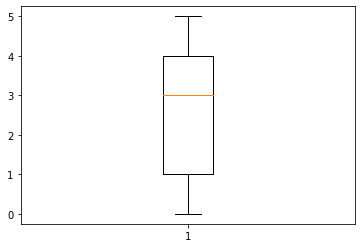

In [29]:
plt.boxplot(data_train['quantityModifications'])
data_train['quantityModifications'].describe()

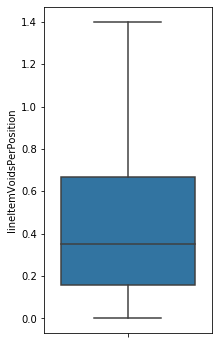

In [30]:
plt.figure(figsize=(3,6))
sns.boxplot(y='lineItemVoidsPerPosition', data=data_train,showfliers=False);

count    1879.000000
mean        0.745404
std         1.327241
min         0.000000
25%         0.160000
50%         0.350000
75%         0.666667
max        11.000000
Name: lineItemVoidsPerPosition, dtype: float64

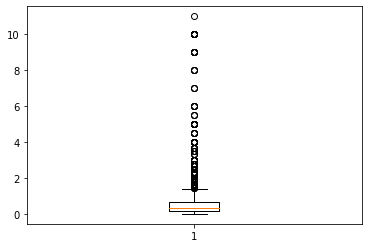

In [31]:
plt.boxplot(data_train['lineItemVoidsPerPosition'])
data_train['lineItemVoidsPerPosition'].describe()

In [32]:
Quartile_Bawah = np.percentile(data_train['lineItemVoidsPerPosition'],25)
Quartile_Atas = np.percentile(data_train['lineItemVoidsPerPosition'],75)
IQR = Quartile_Atas-Quartile_Bawah
IQR

0.5066666666666669

In [33]:
Upper = Quartile_Atas+1.5*IQR
Lower = Quartile_Bawah+1.5*IQR
Upper,Lower

(1.4266666666666674, 0.9200000000000005)

In [34]:
data_train[(data_train["lineItemVoidsPerPosition"]>Upper) | (data_train["lineItemVoidsPerPosition"]>Lower)].shape[0]

347

In [35]:
indexUpper= data_train[(data_train['lineItemVoidsPerPosition'] > data_train['lineItemVoidsPerPosition'].quantile(0.75))].index
indexLower= data_train[(data_train['lineItemVoidsPerPosition'] < data_train['lineItemVoidsPerPosition'].quantile(0.25))].index
data_train.drop(indexUpper, inplace=True)
data_train.drop(indexLower, inplace=True)
data_train['lineItemVoidsPerPosition'].describe()

count    941.000000
mean       0.370692
std        0.138268
min        0.160000
25%        0.250000
50%        0.350000
75%        0.470588
max        0.666667
Name: lineItemVoidsPerPosition, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2ba3a3648>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2ba381088>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2ba3fccc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2ba38f608>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2ba38f648>],
 'means': []}

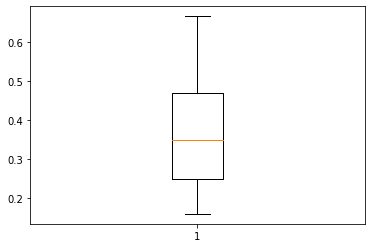

In [36]:
plt.boxplot(data_train['lineItemVoidsPerPosition'])

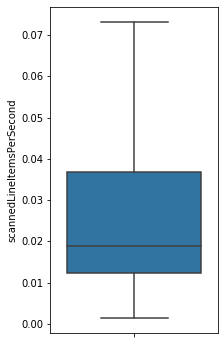

In [37]:
plt.figure(figsize=(3,6))
sns.boxplot(y='scannedLineItemsPerSecond', data=data_train,showfliers=False);

count    941.000000
mean       0.061576
std        0.259335
min        0.001325
25%        0.012366
50%        0.018975
75%        0.036750
max        4.833333
Name: scannedLineItemsPerSecond, dtype: float64

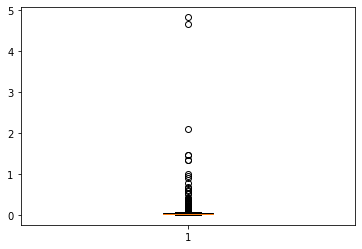

In [38]:
plt.boxplot(data_train['scannedLineItemsPerSecond'])
data_train['scannedLineItemsPerSecond'].describe()

In [39]:
Quartile_Bawah = np.percentile(data_train['scannedLineItemsPerSecond'],25)
Quartile_Atas = np.percentile(data_train['scannedLineItemsPerSecond'],75)
IQR = Quartile_Atas-Quartile_Bawah
IQR

0.0243844489340973

In [40]:
Upper = Quartile_Atas+1.5*IQR
Lower = Quartile_Bawah+1.5*IQR
Upper,Lower

(0.07332715696014014, 0.04894270802604285)

In [41]:
data_train[(data_train["scannedLineItemsPerSecond"]>Upper) | (data_train["scannedLineItemsPerSecond"]>Lower)].shape[0]

182

In [42]:
indexUpper= data_train[(data_train['scannedLineItemsPerSecond'] > data_train['scannedLineItemsPerSecond'].quantile(0.75))].index
indexLower= data_train[(data_train['scannedLineItemsPerSecond'] < data_train['scannedLineItemsPerSecond'].quantile(0.25))].index
data_train.drop(indexUpper, inplace=True)
data_train.drop(indexLower, inplace=True)
data_train['scannedLineItemsPerSecond'].describe()

count    471.000000
mean       0.020739
std        0.006452
min        0.012366
25%        0.015374
50%        0.018975
75%        0.024894
max        0.036750
Name: scannedLineItemsPerSecond, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2b9aa8cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2b9ac21c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2b9aa8448>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2b697c9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2b3e945c8>],
 'means': []}

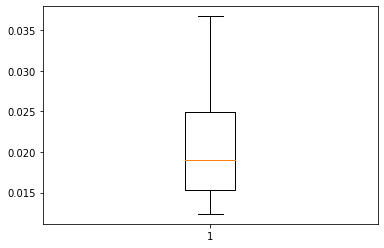

In [43]:
plt.boxplot(data_train['scannedLineItemsPerSecond'])

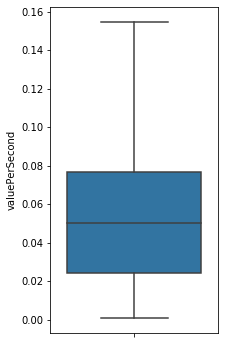

In [44]:
plt.figure(figsize=(3,6))
sns.boxplot(y='valuePerSecond', data=data_train,showfliers=False);

count    471.000000
mean       0.059035
std        0.061591
min        0.000551
25%        0.024196
50%        0.050065
75%        0.076827
max        0.914409
Name: valuePerSecond, dtype: float64

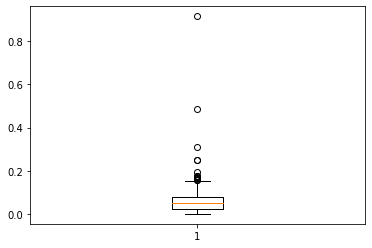

In [45]:
plt.boxplot(data_train['valuePerSecond'])
data_train['valuePerSecond'].describe()

In [46]:
Quartile_Bawah = np.percentile(data_train['valuePerSecond'],25)
Quartile_Atas = np.percentile(data_train['valuePerSecond'],75)
IQR = Quartile_Atas-Quartile_Bawah
IQR

0.0526311567998757

In [47]:
Upper = Quartile_Atas+1.5*IQR
Lower = Quartile_Bawah+1.5*IQR
Upper,Lower

(0.15577408882188848, 0.1031429320220128)

In [48]:
data_train[(data_train["valuePerSecond"]>Upper) | (data_train["valuePerSecond"]>Lower)].shape[0]

59

In [49]:
indexUpper= data_train[(data_train['valuePerSecond'] > data_train['valuePerSecond'].quantile(0.75))].index
indexLower= data_train[(data_train['valuePerSecond'] < data_train['valuePerSecond'].quantile(0.25))].index
data_train.drop(indexUpper, inplace=True)
data_train.drop(indexLower, inplace=True)
data_train['valuePerSecond'].describe()

count    235.000000
mean       0.050142
std        0.014784
min        0.024244
25%        0.037605
50%        0.050065
75%        0.062852
max        0.076819
Name: valuePerSecond, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2b97eba48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2b9cb0548>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2b97c4108>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2b937d788>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2b937d508>],
 'means': []}

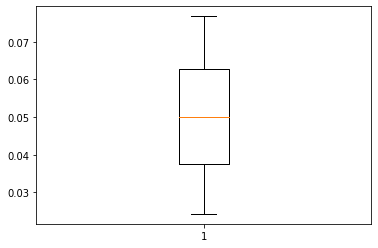

In [50]:
plt.boxplot(data_train['valuePerSecond'])

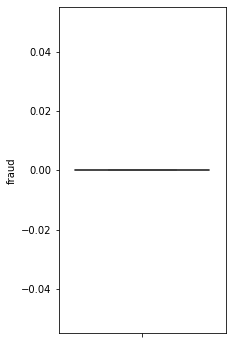

In [51]:
plt.figure(figsize=(3,6))
sns.boxplot(y='fraud', data=data_train,showfliers=False);

count    235.000000
mean       0.131915
std        0.339121
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fraud, dtype: float64

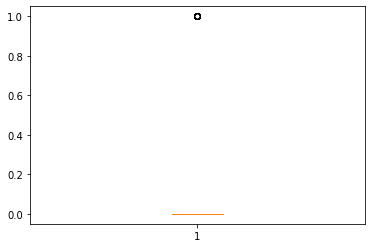

In [52]:
plt.boxplot(data_train['fraud'])
data_train['fraud'].describe()

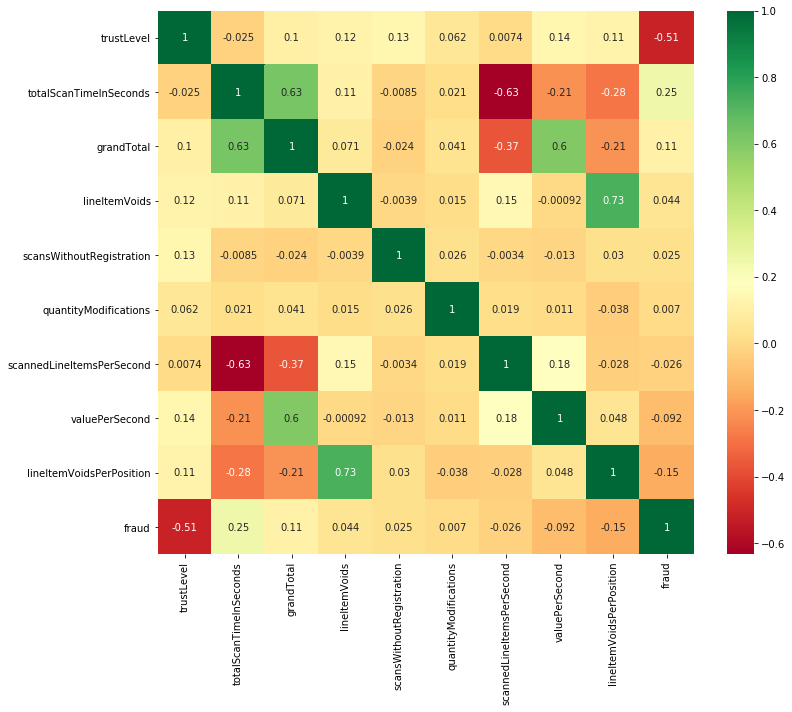

In [53]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_train.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [75]:
data_train.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,-0.024948,0.103686,0.120705,0.132895,0.061527,0.007441,0.136289,0.113809,-0.514081
totalScanTimeInSeconds,-0.024948,1.000000,0.626141,0.107065,-0.008474,0.021292,-0.633287,-0.213530,-0.282647,0.251497
grandTotal,0.103686,0.626141,1.000000,0.071234,-0.023717,0.041304,-0.366228,0.599572,-0.207748,0.113001
lineItemVoids,0.120705,0.107065,0.071234,1.000000,-0.003910,0.014895,0.147232,-0.000919,0.726872,0.043623
scansWithoutRegistration,0.132895,-0.008474,-0.023717,-0.003910,1.000000,0.026107,-0.003432,-0.012548,0.030141,0.024787
quantityModifications,0.061527,0.021292,0.041304,0.014895,0.026107,1.000000,0.019430,0.010825,-0.037809,0.006964
scannedLineItemsPerSecond,0.007441,-0.633287,-0.366228,0.147232,-0.003432,0.019430,1.000000,0.184138,-0.028249,-0.026117
valuePerSecond,0.136289,-0.213530,0.599572,-0.000919,-0.012548,0.010825,0.184138,1.000000,0.048441,-0.092386
lineItemVoidsPerPosition,0.113809,-0.282647,-0.207748,0.726872,0.030141,-0.037809,-0.028249,0.048441,1.000000,-0.146879
fraud,-0.514081,0.251497,0.113001,0.043623,0.024787,0.006964,-0.026117,-0.092386,-0.146879,1.000000


In [74]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=data_train[data_train.columns[:9]]
Y=data_train['fraud']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

trustLevel                   0.349842
totalScanTimeInSeconds       0.145916
grandTotal                   0.124942
valuePerSecond               0.101868
scannedLineItemsPerSecond    0.089816
lineItemVoidsPerPosition     0.057838
scansWithoutRegistration     0.047446
lineItemVoids                0.044251
quantityModifications        0.038080
dtype: float64

In [54]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_train.drop(["fraud"],axis = 1),),
        columns=['trustLevel', 'scannedLineItemsPerSecond','totalScanTimeInSeconds',"quantityModifications","scansWithoutRegistration","lineItemVoids","grandTotal","valuePerSecond","lineItemVoidsPerPosition"])

Normalisasi

Normalisasi data dilakukan untuk penskalaan nilai atribut dari data sehingga nilai data berada pada range tertentu. Teknik normalisasi yang dilakukan adalah Minmax. Minmax merupakan metode normalisasi dengan melakukan transformasi linier terhadap data asli.

In [55]:
def normalisasi(X_train_, X_test_):
  scaler = MinMaxScaler()
  X_train_minmax = scaler.fit_transform(X_train_)
  X_train_ = pd.DataFrame(X_train_minmax, columns=X_train_.columns)
  X_test_minmax = scaler.transform(X_test_)
  X_test_ = pd.DataFrame(X_test_minmax, columns=X_test_.columns)
  return X_train_,X_test_

In [56]:
X.head()

,trustLevel,scannedLineItemsPerSecond,totalScanTimeInSeconds,quantityModifications,scansWithoutRegistration,lineItemVoids,grandTotal,valuePerSecond,lineItemVoidsPerPosition
0,0.819430,-0.353276,-0.146207,-0.176217,-1.440957,0.340792,1.350183,0.119028,-0.834980
1,1.390843,1.798119,1.605992,0.229773,-0.163127,0.896947,-0.617589,0.094864,-0.575246
2,1.390843,-0.621836,0.354155,-0.176217,-1.440957,-0.215362,1.446171,1.212218,-0.700303
3,0.248017,-1.199823,-1.344467,0.229773,-1.440957,-1.327670,1.117950,-0.827623,0.359796
4,-0.323395,0.350233,-0.695953,1.447744,1.753618,-1.327670,-0.479185,-1.153296,1.113025


In [57]:
y = data_train.fraud

In [58]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0, stratify=y)

In [59]:
X_train

,trustLevel,scannedLineItemsPerSecond,totalScanTimeInSeconds,quantityModifications,scansWithoutRegistration,lineItemVoids,grandTotal,valuePerSecond,lineItemVoidsPerPosition
90,0.819430,0.102107,-1.110592,0.229773,-0.802042,-0.771516,-0.989949,-1.494133,0.891487
63,-0.323395,0.043725,0.089531,-0.582207,0.156330,0.896947,0.219481,0.005215,-0.845370
48,-0.323395,-0.362034,-1.472120,1.447744,-1.121500,0.340792,0.867739,-1.706466,0.533618
16,0.819430,0.154652,1.308757,1.447744,-1.440957,-0.771516,-0.601152,1.344440,1.489639
177,1.390843,-1.532603,-1.176748,0.635764,-0.482585,-1.327670,1.648514,-0.001252,0.914807
...,...,...,...,...,...,...,...,...,...
180,-1.466220,-0.367872,-0.811959,-0.988198,1.114703,1.453101,-1.112223,-0.787599,0.036984
187,1.390843,-1.850788,-1.405498,1.041754,1.114703,1.453101,1.387063,0.068088,2.368406
26,0.819430,-1.100572,-0.711327,1.447744,0.475788,0.896947,2.666442,0.217203,0.305994
65,-0.894808,0.753072,0.322475,-1.394188,1.434160,-0.771516,-1.006086,-0.335510,-1.146661


In [60]:
X_train.shape

(188, 9)

In [61]:
X_test

,trustLevel,scannedLineItemsPerSecond,totalScanTimeInSeconds,quantityModifications,scansWithoutRegistration,lineItemVoids,grandTotal,valuePerSecond,lineItemVoidsPerPosition
192,0.819430,1.322302,0.645334,1.041754,-0.163127,0.896947,-0.762850,-0.413887,0.359796
70,-1.466220,0.665499,0.085804,-1.394188,-1.121500,-0.771516,-1.078095,-0.515443,-1.067374
47,-0.894808,-0.837851,-1.463268,0.635764,-0.802042,-0.771516,0.482633,-1.381316,0.736410
133,0.819430,-1.068462,-0.644240,-0.988198,1.114703,-1.327670,-0.638940,0.288691,0.243915
43,-0.323395,-1.696074,-1.224734,-0.582207,1.753618,0.896947,1.249692,0.201518,0.171489
185,-0.894808,1.360250,-0.302745,1.041754,0.475788,-0.215362,-0.783993,-1.278129,0.359796
99,0.819430,0.213034,0.030830,0.635764,0.156330,0.340792,0.746100,-0.221422,-0.393432
226,-0.894808,0.834808,-0.839446,-0.582207,1.434160,-0.771516,-0.457782,-1.551334,-0.845370
146,-1.466220,-0.980888,-0.749530,1.041754,-0.802042,-0.215362,2.575587,-0.025753,-0.055778
222,1.390843,-0.904991,-1.211224,1.041754,0.795245,0.340792,-0.417900,-0.903724,2.368406


In [62]:
X_test.shape

(47, 9)

In [63]:
y_train

614     0
394     0
303     0
88      0
1443    0
       ..
1455    0
1506    0
150     0
408     0
820     0
Name: fraud, Length: 188, dtype: int64

In [64]:
y_train.shape

(188,)

In [65]:
y_test

1568    0
441     0
296     0
1031    0
268     0
1466    1
692     0
1811    1
1137    1
1797    0
56      0
531     0
855     0
655     0
1603    0
700     0
1579    0
1129    0
137     0
351     0
604     0
1608    0
1838    1
1793    0
1345    0
97      1
1268    0
1802    0
656     0
1266    0
1343    0
644     0
840     0
1804    0
231     0
1040    0
1569    0
1656    0
1550    0
554     0
503     0
187     0
229     0
222     0
882     1
1578    0
1784    0
Name: fraud, dtype: int64

In [66]:
y_test.shape

(47,)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)



[[ 0.80165587  0.06645385 -1.16752793 ... -0.99780616 -1.52557989
   0.99385721]
 [-0.33151183  0.00812834  0.02060579 ...  0.19229874 -0.05125087
  -0.79434851]
 [-0.33151183 -0.39723391 -1.52544399 ...  0.8301976  -1.73437023
   0.62540823]
 ...
 [ 0.80165587 -1.13505153 -0.77225208 ...  2.60015973  0.15719968
   0.39105462]
 [-0.89809567  0.71678321  0.2512218  ... -1.01368593 -0.38629002
  -1.10454746]
 [ 1.36823972  0.01396089 -0.37144144 ...  0.61669281 -0.53216443
   0.39105462]]
[[ 0.80165587  1.28545687  0.5708556   1.10543744 -0.14973492  0.92604823
  -0.77433647 -0.46336     0.44644729]
 [-1.46467952  0.62929496  0.01691593 -1.38842943 -1.13171741 -0.73729954
  -1.08454427 -0.56322068 -1.02291615]
 [-0.89809567 -0.87258677 -1.51668058  0.68979297 -0.80438991 -0.73729954
   0.45124516 -1.41464586  0.83419598]
 [ 0.80165587 -1.10297251 -0.70583467 -0.97278495  1.15957507 -1.2917488
  -0.65240592  0.22749441  0.32714001]
 [-0.33151183 -1.72997167 -1.28052978 -0.55714047  1.8142

In [68]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[38  3]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.50      0.50      0.50         6

    accuracy                           0.87        47
   macro avg       0.71      0.71      0.71        47
weighted avg       0.87      0.87      0.87        47

Accuracy: 0.8723404255319149


In [70]:
X_train = data_train.iloc[:, :-1].values
X_test = data_test.iloc[:, :-1].values
y_train = data_train.iloc[:, 9].values
y_test = data_test.iloc[:, 9].values

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [71]:
data_test['fraud'] = y_pred
data_test.to_csv('HasilPrediksiDT.csv')

In [72]:
data_hasil_from_csv = pd.read_csv('HasilPrediksiDT.csv')
data_hasil_from_csv.drop(columns=['Unnamed: 0'])

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
498116,4,783,59.10,2,2,0,0.012771,0.075479,0.200000,0
498117,1,278,98.90,9,5,4,0.050360,0.355755,0.642857,1
498118,3,300,5.41,6,6,4,0.030000,0.018033,0.666667,0
498119,2,1524,33.97,2,5,3,0.005906,0.022290,0.222222,1


0    427233
1     70888
Name: fraud, dtype: int64


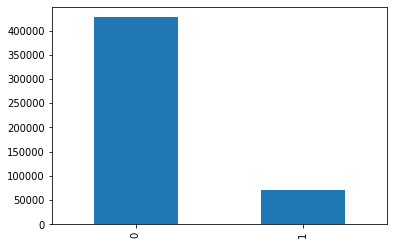

In [73]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data_hasil_from_csv["fraud"].map(lambda x: color_wheel.get(x + 1))
print(data_hasil_from_csv.fraud.value_counts())
p=data_hasil_from_csv.fraud.value_counts().plot(kind="bar")